# 绘制各类别准确率评估指标柱状图

同济子豪兄：https://space.bilibili.com/1900783

## 设置Matplotlib中文字体

In [1]:
# # windows操作系统
# plt.rcParams['font.sans-serif']=['SimHei']  # 用来正常显示中文标签 
# plt.rcParams['axes.unicode_minus']=False  # 用来正常显示负号

In [2]:
# Mac操作系统，参考 https://www.ngui.cc/51cto/show-727683.html
# 下载 simhei.ttf 字体文件
# !wget https://zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com/20220716-mmclassification/dataset/SimHei.ttf

In [1]:
# Linux操作系统，例如 云GPU平台：https://featurize.cn/?s=d7ce99f842414bfcaea5662a97581bd1
# 如果遇到 SSL 相关报错，重新运行本代码块即可
!wget https://zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com/20220716-mmclassification/dataset/SimHei.ttf -O /environment/miniconda3/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/SimHei.ttf
!rm -rf /home/featurize/.cache/matplotlib

import matplotlib
matplotlib.rc("font",family='SimHei') # 中文字体

--2022-08-14 15:58:56--  https://zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com/20220716-mmclassification/dataset/SimHei.ttf
Connecting to 172.16.0.13:5848... connected.
Proxy request sent, awaiting response... 200 OK
Length: 10050868 (9.6M) [application/x-font-ttf]
Saving to: ‘/environment/miniconda3/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/SimHei.ttf’

/environment/minico 100%[===================>]   9.58M  19.6MB/s    in 0.5s    

2022-08-14 15:58:57 (19.6 MB/s) - ‘/environment/miniconda3/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/SimHei.ttf’ saved [10050868/10050868]



## 导入工具包

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## 导入各类别准确率评估指标表格

In [3]:
df = pd.read_csv('各类别准确率评估指标.csv')

In [4]:
df

,类别,precision,recall,f1-score,support,AUC
0,哈密瓜,0.906250,0.783784,0.840580,37.0,0.992705
1,圣女果,0.928571,0.684211,0.787879,38.0,0.994686
2,山竹,1.000000,0.828571,0.906250,35.0,0.999918
3,杨梅,0.864865,0.864865,0.864865,37.0,0.995924
4,柚子,0.756757,0.756757,0.756757,37.0,0.986292
5,柠檬,0.774194,0.827586,0.800000,29.0,0.991355
6,桂圆,0.760000,1.000000,0.863636,38.0,0.999696
7,梨,0.852941,0.783784,0.816901,37.0,0.996287
8,椰子,0.944444,0.894737,0.918919,38.0,0.997596
9,榴莲,0.935484,0.805556,0.865672,36.0,0.994055


## 选择评估指标

In [13]:
feature = 'precision'
# feature = 'recall'
# feature = 'f1-score'
# feature = 'AUC'

## 绘制柱状图

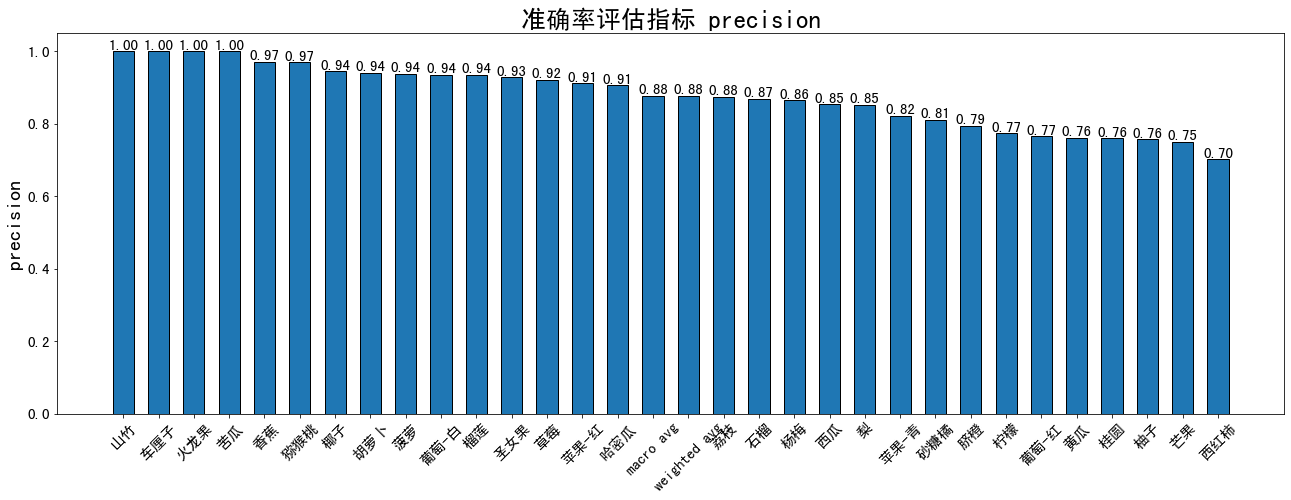

In [14]:
df_plot = df.sort_values(by=feature, ascending=False)

plt.figure(figsize=(22, 7))

x = df_plot['类别']
y = df_plot[feature]

ax = plt.bar(x, y, width=0.6, facecolor='#1f77b4', edgecolor='k')
plt.bar_label(ax, fmt='%.2f', fontsize=15) # 置信度数值

plt.xticks(rotation=45)
plt.tick_params(labelsize=15)
# plt.xlabel('类别', fontsize=20)
plt.ylabel(feature, fontsize=20)
plt.title('准确率评估指标 {}'.format(feature), fontsize=25)

plt.savefig('各类别准确率评估指标柱状图.pdf', dpi=120, bbox_inches='tight')

plt.show()